# IMDB

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


# 1. EDA

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 7s 0us/step


In [6]:
train_data.shape
test_data.shape

(25000,)

In [9]:
train_labels[1]

0

## 데이터 탐색

In [10]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [18]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items() ])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [19]:
decode_review=' '.join( [reverse_word_index.get(i -3, '?') for i in train_data[0]])
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 입력 데이터 준비

In [20]:
import numpy as np

In [23]:
def vectorize_sequences(sequences, dimensions=10000) :
    #크기가 (sequences, dimensions)이고 우너소가 0인 행렬을 만들어준다
    results = np.zeros((len(sequences), dimensions))
    
    for i, sequences in enumerate(sequences) :
        results[i, sequences] = 1 #result[i]에서 특정 인덱스 위치를 1로 만들어 준다.
    return results

In [24]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
x_train.shape

(25000, 10000)

In [28]:
x_test.shape

(25000, 10000)

In [30]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [31]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


# 신경망 모델 만들기

In [34]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #마지막 layer는 binary class 의 이진분류는 sigmoid

In [ ]:
#방법2
model = models.Sequential([
    layers.Dense(16, activation-'relu'm input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
# 컴파일 방법2

In [36]:
x_val = x_train[:10000]
partial_x_train= x_train[10000:] #검증하기 위해 나눔

y_val = y_train[:10000]
patial_y_train= y_train[10000:]

In [56]:
history = model.fit(partial_x_train, 
                    patial_y_train,
                   epochs =20,
                   batch_size=30,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 209us/sample - loss: 1.8887e-10 - accuracy: 1.0000 - val_loss: 3.7736 - val_accuracy: 0.8610
Epoch 2/20
15000/15000 [==============================] - 3s 191us/sample - loss: 1.9956e-10 - accuracy: 1.0000 - val_loss: 3.7766 - val_accuracy: 0.8611
Epoch 3/20
15000/15000 [==============================] - 3s 191us/sample - loss: 2.2277e-10 - accuracy: 1.0000 - val_loss: 3.7794 - val_accuracy: 0.8610
Epoch 4/20
15000/15000 [==============================] - 3s 193us/sample - loss: 2.3756e-10 - accuracy: 1.0000 - val_loss: 3.7818 - val_accuracy: 0.8604
Epoch 5/20
15000/15000 [==============================] - 3s 190us/sample - loss: 2.1397e-10 - accuracy: 1.0000 - val_loss: 3.7789 - val_accuracy: 0.8613
Epoch 6/20
15000/15000 [==============================] - 3s 191us/sample - loss: 2.0104e-10 - accuracy: 1.0000 - val_loss: 3.7816 - val_accuracy: 0.8613
Epoch 7/20
15000/15000 [==

In [40]:
import matplotlib.pyplot as plt

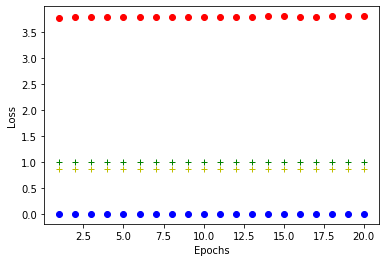

In [57]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Training loss')

plt.plot(epochs, acc, 'g+', label='Training loss')
plt.plot(epochs, val_acc, 'y+', label='Training loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [58]:
result = model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
#batch_size=5, loss: 2.0384 - accuracy: 0.8445
# lbatch_size=30, oss: 2.0572 - accuracy: 0.8436

# 적은 층, 많은 층 모델 빌드

In [64]:
#방법2
from tensorflow.keras import models
from tensorflow.keras import layers

In [65]:

model_small = models.Sequential([
    layers.Dense(128, activation-'relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_small.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_small = model_small.fit(partial_x_train, 
                    patial_y_train,
                   epochs =20,
                   batch_size=50,
                   validation_data = (x_val, y_val))

model_big = models.Sequential([
    layers.Dense(128, activation-'relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model_big.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_big = model_big.fit(partial_x_train, 
                    patial_y_train,
                   epochs =20,
                   batch_size=50,
                   validation_data = (x_val, y_val))


NameError: name 'activation' is not defined

In [ ]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_small = history_small.history['accuracy']
val_acc_small =history_small.history['val_accuracy']
loss_small = history_small.history['loss']
val_loss_small = history_small.history['val_loss']


acc_big = history_big.history['accuracy']
val_acc_big=history_big.history['val_accuracy']
loss_big = history_big.history['loss']
val_loss_big = history_big.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Training loss')

plt.plot(epochs, acc, 'g+', label='Training loss')
plt.plot(epochs, val_acc, 'y+', label='Training loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# L1, L2 norm 정규화

In [ ]:
from ten

In [ ]:
#